In [20]:
# generally useful imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import scipy.stats as  sc

import geopandas as gpd
from matplotlib.collections import PatchCollection

# For interactive plots
import ipywidgets as widgets
from ipywidgets import interact, interact_manual

In [21]:
livestock = pd.read_csv('data/Production_Livestock_E_All_Data_(Normalized).csv', encoding='iso-8859-1')
beehives = livestock.loc[livestock['Item'] == 'Beehives', ['Area', 'Value', 'Year']]
beehives.columns = ['Area', 'Beehives', 'Year']
beehives.reset_index(drop=True, inplace=True)
beehives.head()

,Area,Beehives,Year
0,Albania,95100.0,1961
1,Albania,92800.0,1962
2,Albania,83500.0,1963
3,Albania,96500.0,1964
4,Albania,109800.0,1965


In [22]:
beehives['Year'] = pd.to_datetime(beehives['Year'], format="%Y")
bw = beehives[beehives['Area'] == 'Germany']
bw = bw.reset_index();

In [23]:
bw = bw.drop(['Area', 'index'], axis='columns')

In [24]:
bw = bw.set_index(['Year'])

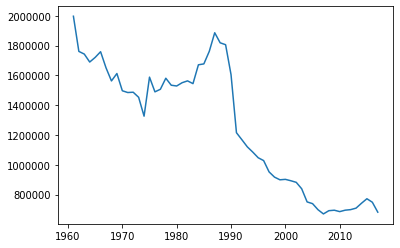

In [25]:
plt.plot(bw)

In [34]:
hp

,Area Code,Area,Item Code,Item,Element Code,Element,Year Code,Year,Unit,Value,Flag
154455,79,Germany,1182,"Honey, natural",5532,Producer Price (USD/tonne),1991,1991,USD,7580.8,NaN
154456,79,Germany,1182,"Honey, natural",5532,Producer Price (USD/tonne),1992,1992,USD,7320.8,NaN
154457,79,Germany,1182,"Honey, natural",5532,Producer Price (USD/tonne),1993,1993,USD,6945.0,NaN
154458,79,Germany,1182,"Honey, natural",5532,Producer Price (USD/tonne),1994,1994,USD,7198.7,NaN
154459,79,Germany,1182,"Honey, natural",5532,Producer Price (USD/tonne),1995,1995,USD,8244.1,NaN
154460,79,Germany,1182,"Honey, natural",5532,Producer Price (USD/tonne),1996,1996,USD,8363.2,NaN
154461,79,Germany,1182,"Honey, natural",5532,Producer Price (USD/tonne),1997,1997,USD,7441.1,NaN
154462,79,Germany,1182,"Honey, natural",5532,Producer Price (USD/tonne),1998,1998,USD,7518.3,NaN
154463,79,Germany,1182,"Honey, natural",5532,Producer Price (USD/tonne),2003,2003,USD,8239.0,NaN
154464,79,Germany,1182,"Honey, natural",5532,Producer Price (USD/tonne),2006,2006,USD,8467.8,NaN


In [64]:
prices = pd.read_csv('data/Prices_E_All_Data_(Normalized).csv',  encoding='iso-8859-1')
honey_price=prices.loc[prices.Item == 'Honey, natural']
hp = honey_price[honey_price['Area'] == 'Switzerland']
hp = hp[hp['Element'] == 'Producer Price (USD/tonne)'] 
hp['Year'] = pd.to_datetime(hp['Year'], format="%Y")
hp = hp.set_index('Year')

bw['Price'] = bw.join(hp)['Value']

In [68]:
production=pd.read_csv('data/Production_LivestockPrimary_E_All_Data_(Normalized).csv', encoding='iso-8859-1')
honey_production=production.loc[(production.Item=='Honey, natural')  & (production.Element=='Production')]

In [69]:
production 

,Area Code,Area,Item Code,Item,Element Code,Element,Year Code,Year,Unit,Value,Flag
0,2,Afghanistan,1062,"Eggs, hen, in shell",5313,Laying,1961,1961,1000 Head,4000.0,F
1,2,Afghanistan,1062,"Eggs, hen, in shell",5313,Laying,1962,1962,1000 Head,4400.0,F
2,2,Afghanistan,1062,"Eggs, hen, in shell",5313,Laying,1963,1963,1000 Head,4600.0,F
3,2,Afghanistan,1062,"Eggs, hen, in shell",5313,Laying,1964,1964,1000 Head,4800.0,F
4,2,Afghanistan,1062,"Eggs, hen, in shell",5313,Laying,1965,1965,1000 Head,5200.0,F
...,...,...,...,...,...,...,...,...,...,...,...
1120810,5817,Net Food Importing Developing Countries,1807,Sheep and Goat Meat,5510,Production,2013,2013,tonnes,3290297.0,A
1120811,5817,Net Food Importing Developing Countries,1807,Sheep and Goat Meat,5510,Production,2014,2014,tonnes,3272290.0,A
1120812,5817,Net Food Importing Developing Countries,1807,Sheep and Goat Meat,5510,Production,2015,2015,tonnes,3559308.0,A
1120813,5817,Net Food Importing Developing Countries,1807,Sheep and Goat Meat,5510,Production,2016,2016,tonnes,3581011.0,A
